# <center> Scraping Zillow - Article

In [173]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time 

In [174]:
city = ["Redding", "Anderson", "Cottonwood", "Red-Bluff", "Corning", "Orland" ]
first_part = "https://www.zillow.com/homes/"
last_part = ",-CA_rb/"
urls = []
for i in city:
    urls.append(first_part + i + last_part)
urls

['https://www.zillow.com/homes/Redding,-CA_rb/',
 'https://www.zillow.com/homes/Anderson,-CA_rb/',
 'https://www.zillow.com/homes/Cottonwood,-CA_rb/',
 'https://www.zillow.com/homes/Red-Bluff,-CA_rb/',
 'https://www.zillow.com/homes/Corning,-CA_rb/',
 'https://www.zillow.com/homes/Orland,-CA_rb/']

In [175]:
urls[0]

'https://www.zillow.com/homes/Redding,-CA_rb/'

In [178]:
time.sleep(8)
def city_scraping(u):
    header = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36" }
    response = requests.get(u, headers = header )
    soup = BeautifulSoup(response.content, 'html.parser')
    #Search for data and store them in a table 
    table = pd.DataFrame(columns = ["Address", "Price", "Detail", "Links"])
    
    houses = soup.find_all("div", class_ = "list-card-info")
    for house in houses:
        try:
            address = house.find("address", {"class":"list-card-addr" }).text    
            price = house.find("div", {"class":"list-card-price" }).text.split("$")[1].replace(",","") #split to take price only, not $ sign
            detail = house.find("ul", {"class":"list-card-details" }).text
            link = house.a["href"] 
        except Exception as e:
            address = None
            link = None 
            detail = None
            price = None


        table = table.append({"Address": address, "Price": price, 
                                "Detail": detail, "Links":link}, ignore_index=True)
    return table
 
    

In [179]:
time.sleep(30)
redding = city_scraping(urls[0])
redding

,Address,Price,Detail,Links
0,"2151 Hemingway St, Redding, CA 96003",415000,"4 bds2 ba1,476 sqft- House for sale",https://www.zillow.com/homedetails/2151-Heming...
1,"19112 Robledo Way, Redding, CA 96003",560000,"3 bds3 ba2,479 sqft- House for sale",https://www.zillow.com/homedetails/19112-Roble...
2,"3421 Pioneer Ln, Redding, CA 96001",470000,"3 bds2 ba1,704 sqft- House for sale",https://www.zillow.com/homedetails/3421-Pionee...
3,"8594 Valley View Rd, Redding, CA 96001",650000,"3 bds3 ba2,719 sqft- House for sale",https://www.zillow.com/homedetails/8594-Valley...
4,"3675 Sacramento Dr, Redding, CA 96001",489000,"4 bds2 ba2,082 sqft- House for sale",https://www.zillow.com/homedetails/3675-Sacram...
5,"1763 Vera Cruz Trl, Redding, CA 96003",385000,"2 bds2 ba1,293 sqft- New construction",https://www.zillow.com/homedetails/1763-Vera-C...
6,"3000 Carson Dr, Redding, CA 96003",430000,"-- bds-- ba1,100 sqft- Multi-family home for sale",https://www.zillow.com/homedetails/3000-Carson...
7,"2018-2030 Kenyon Dr, Redding, CA 96001",49000,4 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/2018-2030-K...
8,"1514 Benton Dr, Redding, CA 96003",285000,"3 bds1 ba1,100 sqft- House for sale",https://www.zillow.com/homedetails/1514-Benton...
9,None,None,None,None


In [180]:
time.sleep(30)
anderson = city_scraping(urls[1])
anderson

,Address,Price,Detail,Links
0,"LOT 28 Renshaw Ln, Anderson, CA 96007",299000,3.97 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/LOT-28-Rens...
1,"5871 Balls Ferry Rd, Anderson, CA 96007",509900,"3 bds2 ba2,055 sqft- House for sale",https://www.zillow.com/homedetails/5871-Balls-...
2,"3552 Cazadero Way, Anderson, CA 96007",380000,"3 bds2 ba1,480 sqft- House for sale",https://www.zillow.com/homedetails/3552-Cazade...
3,"2941 Cobblestone Loop, Anderson, CA 96007",360000,"3 bds2 ba1,584 sqft- House for sale",https://www.zillow.com/homedetails/2941-Cobble...
4,"3356 Thomas Ave, Anderson, CA 96007",369000,"3 bds3 ba1,601 sqft- House for sale",https://www.zillow.com/homedetails/3356-Thomas...
5,"6551 Clear View Dr, Anderson, CA 96007",275000,"3 bds2 ba1,104 sqft- House for sale",https://www.zillow.com/homedetails/6551-Clear-...
6,"16488 China Gulch Dr, Anderson, CA 96007",370000,"4 bds2 ba1,670 sqft- House for sale",https://www.zillow.com/homedetails/16488-China...
7,"LOT 12 Barney Rd, Anderson, CA 96007",50000,0.27 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/LOT-12-Barn...
8,"LOT 11 Barney Rd, Anderson, CA 96007",50000,0.25 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/LOT-11-Barn...
9,None,None,None,None


In [181]:
time.sleep(30)
cottonwood = city_scraping(urls[2])
cottonwood

,Address,Price,Detail,Links
0,"19859 Freshwater Dr, Cottonwood, CA 96022",325000,"3 bds2 ba1,611 sqft- House for sale",https://www.zillow.com/homedetails/19859-Fresh...
1,"17135 Bowman Rd, Cottonwood, CA 96022",290000,"3 bds2 ba1,200 sqft- House for sale",https://www.zillow.com/homedetails/17135-Bowma...
2,"19828 Antelope Creek Dr, Cottonwood, CA 96022",16000,0.41 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/19828-Antel...
3,"19180 Terry Rd, Cottonwood, CA 96022",369000,"3 bds3 ba1,659 sqft- House for sale",https://www.zillow.com/homedetails/19180-Terry...
4,"LOT 3 Quail Ridge Rd, Cottonwood, CA 96022",65500,11.81 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/LOT-3-Quail...
5,"15520 Evergreen Rd, Cottonwood, CA 96022",1425000,"3 bds3 ba2,705 sqft- House for sale",https://www.zillow.com/homedetails/15520-Everg...
6,"3446 Shirley St, Cottonwood, CA 96022",280000,"2 bds1 ba1,272 sqft- House for sale",https://www.zillow.com/homedetails/3446-Shirle...
7,"22290 Adobe Rd, Cottonwood, CA 96022",260000,2 bds-- ba800 sqft- Home for sale,https://www.zillow.com/homedetails/22290-Adobe...
8,"18945 Jewell Rd, Cottonwood, CA 96022",324900,"3 bds2 ba1,710 sqft- House for sale",https://www.zillow.com/homedetails/18945-Jewel...
9,None,None,None,None


In [182]:
time.sleep(30)
red_bluff = city_scraping(urls[3])
red_bluff

,Address,Price,Detail,Links
0,"1140 Aloha St, Red Bluff, CA 96080",225000,"3 bds2 ba1,008 sqft- House for sale",https://www.zillow.com/homedetails/1140-Aloha-...
1,"LOT 9 Canta Del Rio Ln, Red Bluff, CA 96080",128000,1 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/LOT-9-Canta...
2,"827 S Jackson St, Red Bluff, CA 96080",284900,"-- bds-- ba1,600 sqft- Multi-family home for sale",https://www.zillow.com/homedetails/827-S-Jacks...
3,"20875 Live Oak Rd, Red Bluff, CA 96080",179000,2 bds2 ba960 sqft- House for sale,https://www.zillow.com/homedetails/20875-Live-...
4,"14615 Paynes Creek Rd, Red Bluff, CA 96080",749900,"2 bds3 ba2,215 sqft- House for sale",https://www.zillow.com/homedetails/14615-Payne...
5,"1 Aegean Way, Anderson, CA 96007",105000,5 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/1-Aegean-Wa...
6,"2 Aegean Way, Anderson, CA 96007",100000,5 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/2-Aegean-Wa...
7,"3 Aegean Way, Anderson, CA 96007",105000,5 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/3-Aegean-Wa...
8,"21791 Wilcox Rd, Red Bluff, CA 96080",649000,"4 bds3 ba2,860 sqft- House for sale",https://www.zillow.com/homedetails/21791-Wilco...
9,None,None,None,None


In [183]:
time.sleep(35)
corning = city_scraping(urls[4])
corning

,Address,Price,Detail,Links
0,"7404 Smith Rd, Corning, CA 96021",210000,"2 bds2 ba1,040 sqft- House for sale",https://www.zillow.com/homedetails/7404-Smith-...
1,"20432 Corning Rd, Corning, CA 96021",550000,"3 bds3 ba1,814 sqft- House for sale",https://www.zillow.com/homedetails/20432-Corni...
2,"315 South St, Corning, CA 96021",299000,"3 bds2 ba1,008 sqft- House for sale",https://www.zillow.com/homedetails/315-South-S...
3,"619 Almond St, Corning, CA 96021",309000,"3 bds2 ba1,512 sqft- House for sale",https://www.zillow.com/homedetails/619-Almond-...
4,"6987 Shawnee Ct, Corning, CA 96021",249000,"3 bds2 ba1,749 sqft- Home for sale",https://www.zillow.com/homedetails/6987-Shawne...
5,"16835 Elder Creek Cir, Corning, CA 96021",359000,"3 bds2 ba1,803 sqft- House for sale",https://www.zillow.com/homedetails/16835-Elder...
6,"703 South St, Corning, CA 96021",225000,"4 bds2 ba1,690 sqft- House for sale",https://www.zillow.com/homedetails/703-South-S...
7,"22571 Olivewood Ave, Corning, CA 96021",420000,"4 bds2 ba1,344 sqft- House for sale",https://www.zillow.com/homedetails/22571-Olive...
8,"1507 A&b Colusa St, Corning, CA 96021",225000,-- bds-- ba-- sqft- Multi-family home for sale,https://www.zillow.com/homedetails/1507-Ab-Col...
9,None,None,None,None


In [184]:
time.sleep(30)
orland = city_scraping(urls[5])
orland

,Address,Price,Detail,Links
0,"6061 County Road 20, Orland, CA 95963",925000,"2 bds1 ba1,508 sqft- House for sale",https://www.zillow.com/homedetails/6061-County...
1,"6080 County Road 20, Orland, CA 95963",1200000,"3 bds1 ba1,056 sqft- House for sale",https://www.zillow.com/homedetails/6080-County...
2,"6021 County Road 20, Orland, CA 95963",525000,2 bds1 ba992 sqft- House for sale,https://www.zillow.com/homedetails/6021-County...
3,"619 2nd St, Orland, CA 95963",259000,"2 bds1 ba1,024 sqft- House for sale",https://www.zillow.com/homedetails/619-2nd-St-...
4,"6465 County Road 24, Orland, CA 95963",324900,"3 bds2 ba1,655 sqft- Coming soon",https://www.zillow.com/homedetails/6465-County...
5,"0 Olive Ave, Orland, CA 95963",485000,22.51 acres lot- Lot / Land for sale,https://www.zillow.com/homedetails/0-Olive-Ave...
6,"4531 County Road G, Orland, CA 95963",345000,"3 bds2 ba1,424 sqft- House for sale",https://www.zillow.com/homedetails/4531-County...
7,"4298 County Road K 1/2, Orland, CA 95963",550000,"4 bds2 ba1,986 sqft- House for sale",https://www.zillow.com/homedetails/4298-County...
8,"6058 County Road 11, Orland, CA 95963",3599000,"2 bds2 ba3,308 sqft- House for sale",https://www.zillow.com/homedetails/6058-County...
9,None,None,None,None


In [100]:
from datetime import date
import os 
import random

number_list = [30, 10, 43, 41, 22]


city = ["Redding", "Anderson", "Cottonwood", "Red-Bluff", "Corning", "Orland" ]
first_part = "https://www.zillow.com/homes/"
last_part = ",-CA_rb/"
urls = []
for i in city:
    url = first_part + i + last_part
    for t in number_list:
        time.sleep(t)
    table = city_scraping(url)
    directory = r"/Users/xuanthingo/Documents/Derek/Data/"
    name = i + "_"+ str(date.today()) + ".csv"
    table.to_csv(os.path.join(directory,name),encoding='utf-8', index = None, header=True)


In [167]:
def Average(list_price):
    return np.mean(list(map(int, filter(None,list_price))))
    

In [190]:
avg_price = [Average(redding.Price), Average(anderson.Price), Average(cottonwood.Price), Average(red_bluff.Price), 
 Average(corning.Price), Average(orland.Price)]
avg_price

[414777.77777777775,
 295877.77777777775,
 372822.22222222225,
 280644.44444444444,
 316222.22222222225,
 912544.4444444445]

Text(0.5, 1.0, "Average sale houses'price on 2021-10-27")

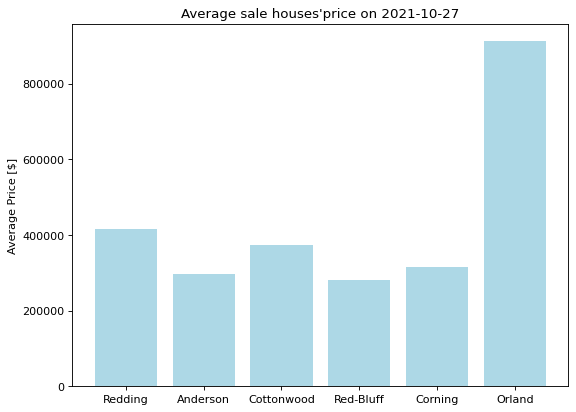

In [202]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.bar(city, avg_price, color = 'lightblue')
plt.ylabel("Average Price [$]")
plt.title("Average sale houses'price on "   + str(date.today()))